# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

/var/folders/wc/1x9439wd4g33gy6gn32jh7bw0000gn/T/ipykernel_93408/2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

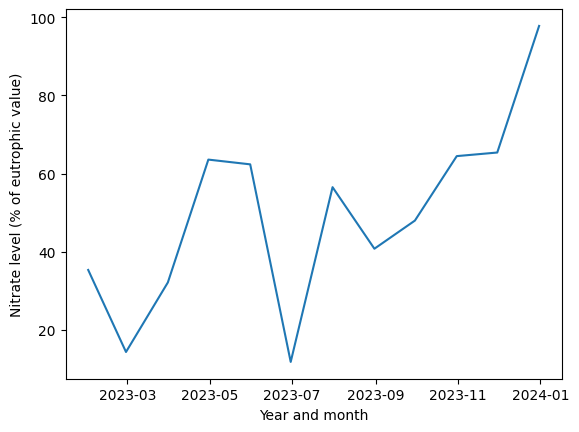

In [2]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

/var/folders/wc/1x9439wd4g33gy6gn32jh7bw0000gn/T/ipykernel_93408/1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

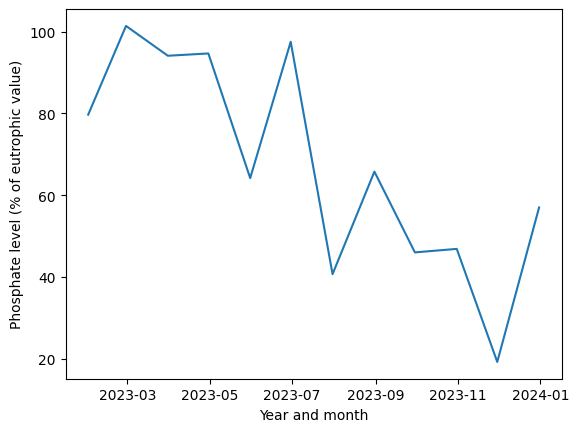

In [3]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

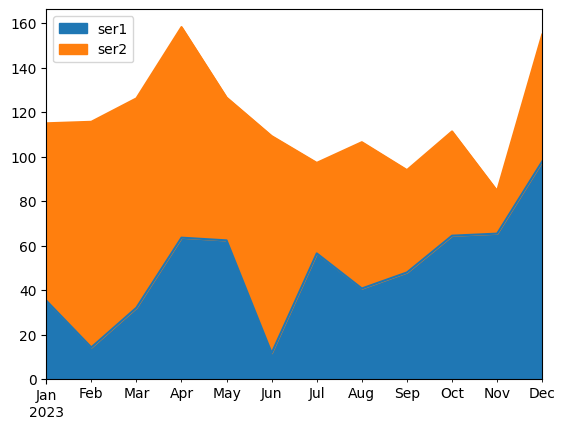

In [4]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

**Pros of an Area Plot:**  
- Shows total nutrient levels more clearly.  
- Makes trends easier to compare.  
- Visually engaging.  

**Cons of an Area Plot:**  
- Can obscure individual trends if stacked.  
- Harder to read overlaps.  
- Less precise for exact values.  

**How to Improve the Graphs:**  
- Use a dual-axis line chart for clarity.  
- Adjust opacity in an area plot to show both layers.  
- Normalize values if they’re on different scales.  
- Add clear labels and legends for better readability.  

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

# NFL First and Future Analysis

In [5]:
import pandas as pd

injury_file = "/Users/chrismckee/Downloads/nfl_injury_list.csv"
df_injury = pd.read_csv(injury_file)

play_list_file = "/Users/chrismckee/Downloads/nfl_play_list.csv"
df_play_list = pd.read_csv(play_list_file)

df_injury["PlayerKey"] = df_injury["PlayerKey"].astype(str)
df_injury["GameID"] = df_injury["GameID"].astype(str)
df_injury["PlayKey"] = df_injury["PlayKey"].astype(str)

df_play_list["PlayerKey"] = df_play_list["PlayerKey"].astype(str)
df_play_list["GameID"] = df_play_list["GameID"].astype(str)
df_play_list["PlayKey"] = df_play_list["PlayKey"].astype(str)

df_merged = df_injury.merge(df_play_list, on=["PlayerKey", "GameID", "PlayKey"], how="left")

df_merged.to_csv("merged_nfl_injury_data.csv", index=False)

print(df_merged.head())



  PlayerKey   GameID     PlayKey BodyPart    Surface  DM_M1  DM_M7  DM_M28  \
0     39873  39873-4  39873-4-32     Knee  Synthetic      1      1       1   
1     46074  46074-7  46074-7-26     Knee    Natural      1      1       0   
2     36557  36557-1  36557-1-70    Ankle  Synthetic      1      1       1   
3     46646  46646-3  46646-3-30    Ankle    Natural      1      0       0   
4     43532  43532-5  43532-5-69    Ankle  Synthetic      1      1       1   

   DM_M42 RosterPosition  PlayerDay  PlayerGame       StadiumType  FieldType  \
0       1     Linebacker       29.0         4.0           Indoors  Synthetic   
1       0     Linebacker       50.0         7.0              Open    Natural   
2       1         Safety        1.0         1.0           Outdoor  Synthetic   
3       0     Linebacker       15.0         3.0           Outdoor    Natural   
4       1  Wide Receiver       32.0         5.0  Retractable Roof  Synthetic   

   Temperature         Weather PlayType  PlayerGam

       DM_M1       DM_M7      DM_M28      DM_M42   PlayerDay  PlayerGame  \
count  105.0  105.000000  105.000000  105.000000   77.000000   77.000000   
mean     1.0    0.723810    0.352381    0.276190  139.727273    8.727273   
std      0.0    0.449257    0.480003    0.449257  168.401122    6.781624   
min      1.0    0.000000    0.000000    0.000000  -34.000000    1.000000   
25%      1.0    0.000000    0.000000    0.000000   18.000000    4.000000   
50%      1.0    1.000000    0.000000    0.000000   50.000000    7.000000   
75%      1.0    1.000000    1.000000    1.000000  365.000000   12.000000   
max      1.0    1.000000    1.000000    1.000000  471.000000   30.000000   

       Temperature  PlayerGamePlay  
count    77.000000       77.000000  
mean    -31.389610       25.766234  
std     308.335222       19.918846  
min    -999.000000        1.000000  
25%      46.000000       10.000000  
50%      68.000000       19.000000  
75%      75.000000       38.000000  
max      89.000000 

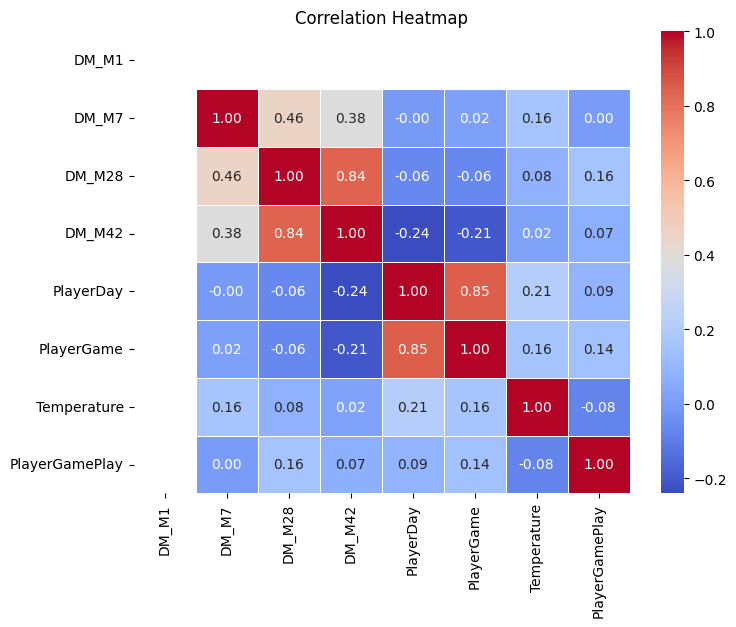

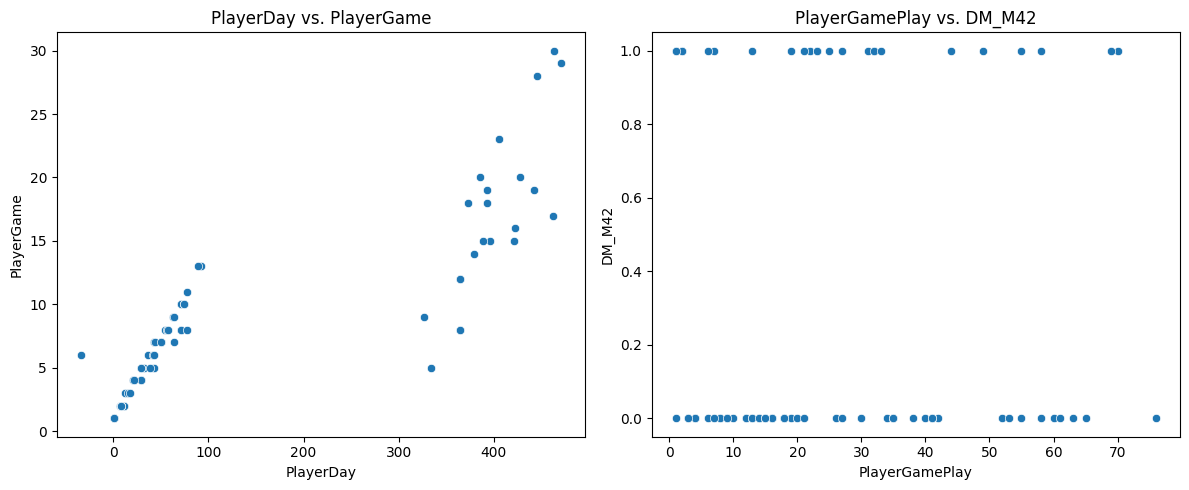

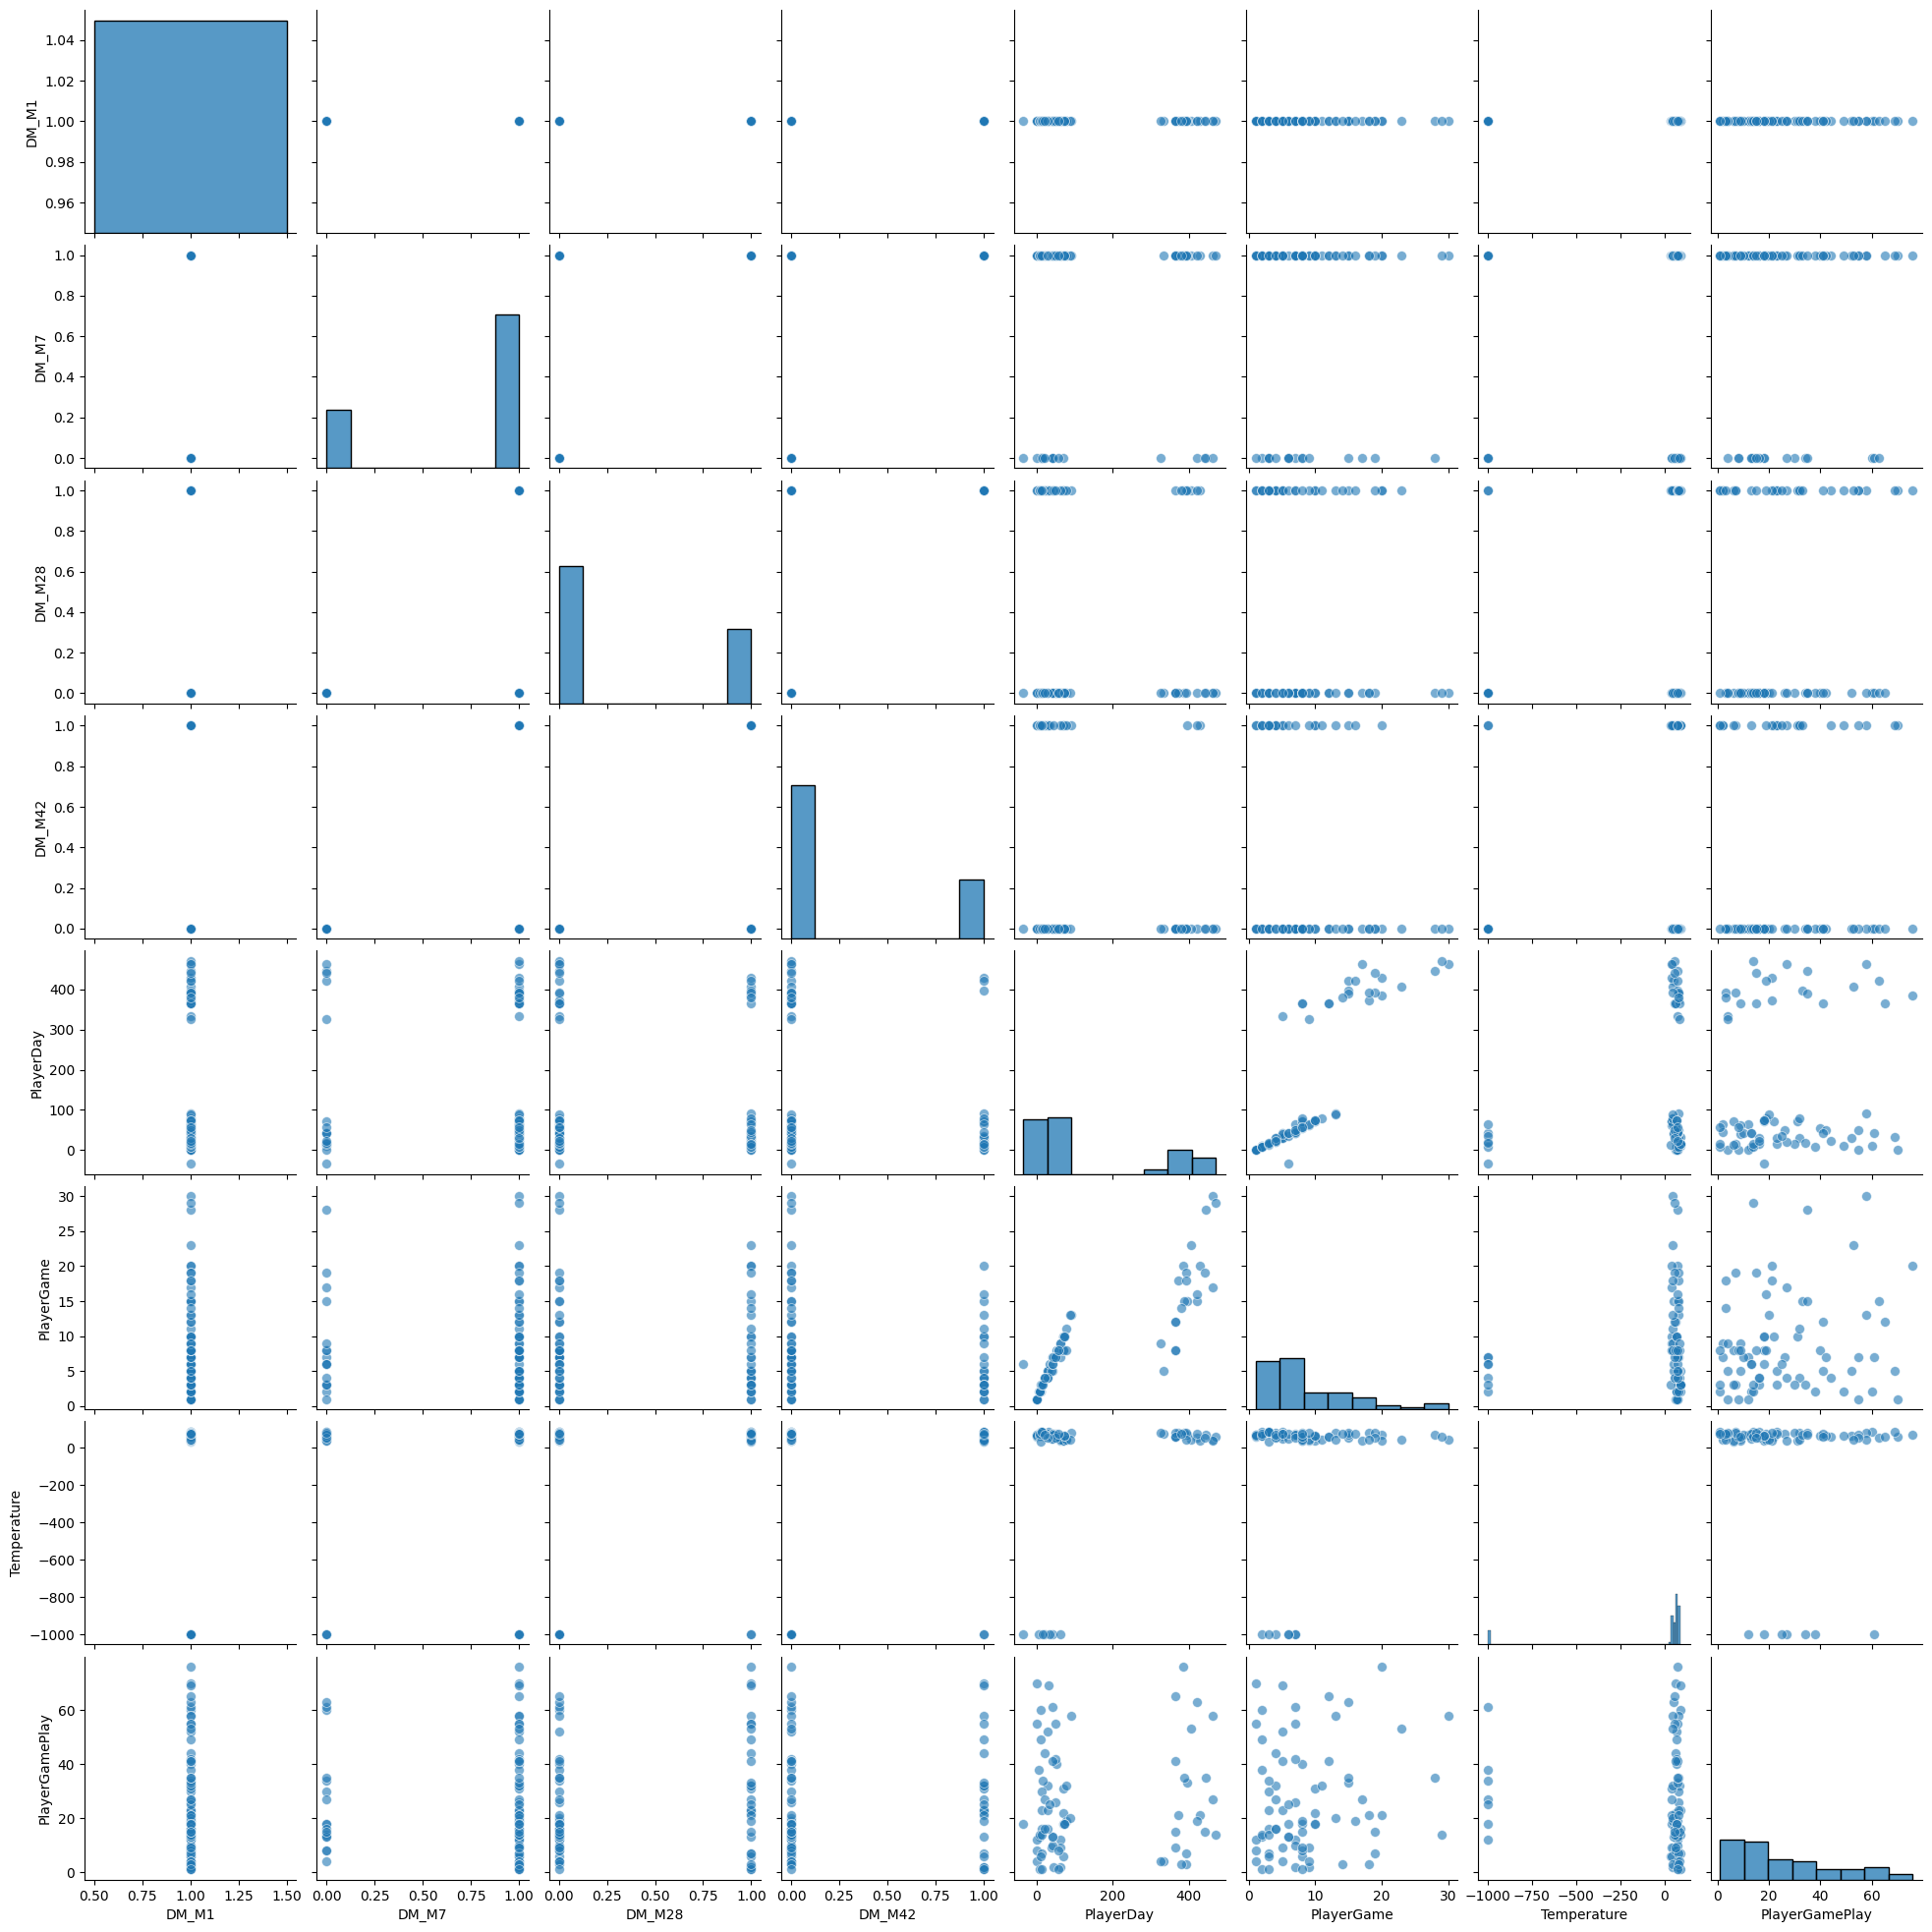

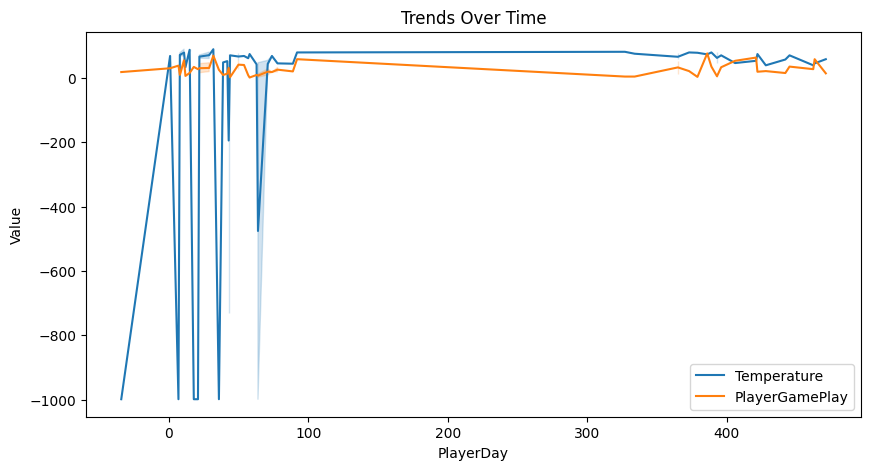

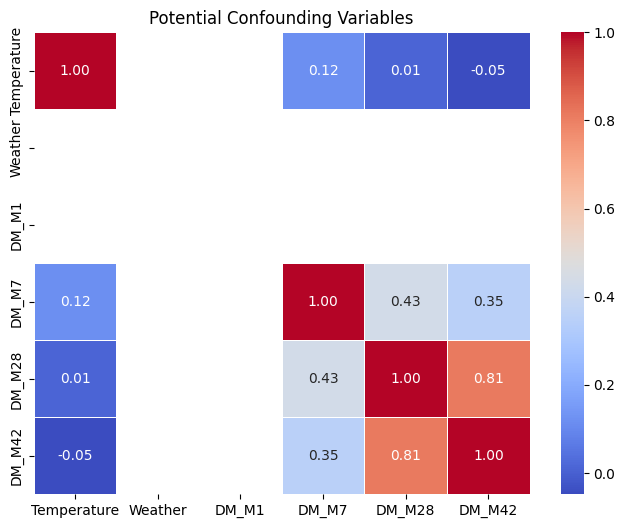

       DM_M1       DM_M7      DM_M28      DM_M42   PlayerDay  PlayerGame  \
count  105.0  105.000000  105.000000  105.000000   77.000000   77.000000   
mean     1.0    0.723810    0.352381    0.276190  139.727273    8.727273   
std      0.0    0.449257    0.480003    0.449257  168.401122    6.781624   
min      1.0    0.000000    0.000000    0.000000  -34.000000    1.000000   
25%      1.0    0.000000    0.000000    0.000000   18.000000    4.000000   
50%      1.0    1.000000    0.000000    0.000000   50.000000    7.000000   
75%      1.0    1.000000    1.000000    1.000000  365.000000   12.000000   
max      1.0    1.000000    1.000000    1.000000  471.000000   30.000000   

       Temperature  PlayerGamePlay  
count    77.000000       77.000000  
mean    -31.389610       25.766234  
std     308.335222       19.918846  
min    -999.000000        1.000000  
25%      46.000000       10.000000  
50%      68.000000       19.000000  
75%      75.000000       38.000000  
max      89.000000 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['DM_M1', 'DM_M7', 'DM_M28', 'DM_M42', 'PlayerDay', 'PlayerGame', 'Temperature', 'PlayerGamePlay']
df_numeric = df_merged[numeric_cols].apply(pd.to_numeric, errors='coerce')

print(df_numeric.describe()) 
print(df_numeric.isnull().sum())  

plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=df_numeric["PlayerDay"], y=df_numeric["PlayerGame"])
plt.xlabel("PlayerDay")
plt.ylabel("PlayerGame")
plt.title("PlayerDay vs. PlayerGame")

plt.subplot(1, 2, 2)
sns.scatterplot(x=df_numeric["PlayerGamePlay"], y=df_numeric["DM_M42"])
plt.xlabel("PlayerGamePlay")
plt.ylabel("DM_M42")
plt.title("PlayerGamePlay vs. DM_M42")

plt.tight_layout()
plt.show()

sns.pairplot(df_numeric, diag_kind="hist", plot_kws={'alpha': 0.6, 's': 50})
plt.show()

df_describe = df_numeric.describe()

outliers = {}
for col in numeric_cols:
    q1 = df_numeric[col].quantile(0.25)
    q3 = df_numeric[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers[col] = df_numeric[(df_numeric[col] < lower_bound) | (df_numeric[col] > upper_bound)][col]

redundant_vars = df_numeric.corr().abs().unstack().sort_values(ascending=False)
redundant_vars = redundant_vars[redundant_vars < 1].reset_index()
redundant_vars.columns = ['Variable1', 'Variable2', 'Correlation']
highly_correlated = redundant_vars[redundant_vars['Correlation'] > 0.8]

df_time_series = df_numeric[['PlayerDay', 'Temperature', 'PlayerGamePlay']]
df_time_series = df_time_series.sort_values(by='PlayerDay')

plt.figure(figsize=(10, 5))
sns.lineplot(x=df_time_series['PlayerDay'], y=df_time_series['Temperature'], label="Temperature")
sns.lineplot(x=df_time_series['PlayerDay'], y=df_time_series['PlayerGamePlay'], label="PlayerGamePlay")
plt.xlabel("PlayerDay")
plt.ylabel("Value")
plt.title("Trends Over Time")
plt.legend()
plt.show()

df_confounding = df_merged[['Temperature', 'Weather', 'DM_M1', 'DM_M7', 'DM_M28', 'DM_M42']]
df_confounding = df_confounding.dropna().apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(8, 6))
sns.heatmap(df_confounding.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Potential Confounding Variables")
plt.show()

print(df_describe)
print(highly_correlated)
print({k: v.tolist() for k, v in outliers.items() if not v.empty})


## Analysis Conclusions

### 1. Is the data usable? Does it make sense?  
The dataset includes key variables related to injuries, player performance, and environmental factors. The structure looks solid, and there are meaningful relationships between some variables. However, temperature has extreme values, and a few columns have missing data.  

The data is mostly usable, but some cleaning is needed to handle outliers and fill in missing values.

### 2. Are there any outliers?  
Yes, there are some clear outliers.  

- Temperature has unrealistic values, including negative numbers that don’t make sense.  
- PlayerGamePlay has a few very high numbers that might be unusual but could still be valid.  
- Some DM_M variables show extreme values, though these might be real and not errors.  

Next steps: Remove or adjust extreme values where necessary to avoid distorting the analysis.

### 3. Are any variables highly correlated, making some redundant?  
- PlayerDay and PlayerGame are closely related with a correlation of about 0.85, so one could be removed.  
- DM_M28 and DM_M42 are also strongly correlated with a correlation of about 0.84. But this makes sense given they're both tracking days missed by players after injury
- Other correlations are low, meaning most variables are independent.  

It may be worth dropping one of the highly correlated pairs to simplify the dataset.

### 4. Do the line graphs show any patterns over time?  
- Temperature fluctuates over time, but the extreme values may be distorting trends.  
- PlayerGamePlay varies, but there is no clear seasonal trend or long-term pattern.  
- No signs of data drift, meaning comparisons over time should still be valid.  

Overall, trends look stable, and time-based analysis should hold up.

### 5. Are there confounding variables that could explain certain patterns?  
Some variables might be influencing others in ways that are not immediately obvious.  

- Weather conditions might impact injury rates, but the effect is unclear without further analysis.  
- Temperature could be affecting both PlayerGamePlay and the likelihood of injury.  
- Playing surface and field type might play a role in injuries, but this was not deeply analyzed here.  
- Roster position could also be a factor since different positions face different levels of physical risk.  

It would be worth exploring these further to understand what is driving injury risks.


### Final Takeaways  
- The data is usable but needs some cleaning to remove outliers and fill in gaps.  
- Some variables are highly correlated, meaning a few could be removed to simplify the analysis.  
- No major data drift, so time-based comparisons should be reliable.  
- Further analysis on confounding variables like weather, surface type, and player position could add valuable insights.  


# Punt Analytics Analysis

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Define file paths
base_path = "/Users/chrismckee/Downloads/"

# Load datasets
punt_game_data = pd.read_csv(base_path + "punt_game_data.csv")
punt_play_data = pd.read_csv(base_path + "punt_play_data.csv")
punt_player_data = pd.read_csv(base_path + "punt_player_data.csv")
punt_play_role_data = pd.read_csv(base_path + "punt_player_role_data.csv")
punt_video_review = pd.read_csv(base_path + "punt_video_review.csv")

In [9]:
# Drop duplicate "Season_Year" columns before merging
punt_play_data = punt_play_data.drop(columns=["Season_Year"], errors="ignore")
punt_video_review = punt_video_review.drop(columns=["Season_Year"], errors="ignore")
punt_game_data = punt_game_data.drop(columns=["Season_Year"], errors="ignore")

# Merge Video Review (concussion dataset) with Play Data
concussion_plays = punt_play_data.merge(punt_video_review, on=["GameKey", "PlayID"], how="inner")

# Merge with Game Data for additional details
concussion_plays = concussion_plays.merge(punt_game_data, on=["GameKey"], how="left")

# Merge with Player Data to get player details
concussion_plays = concussion_plays.merge(punt_player_data, on=["GSISID"], how="left")

# Merge with Play Role Data to understand player actions
concussion_plays = concussion_plays.merge(punt_play_role_data, on=["GameKey", "PlayID", "GSISID"], how="left")

# Check merged concussion dataset
print(concussion_plays.head())


  Season_Type_x  GameKey Game_Date_x  Week_x  PlayID Game_Clock YardLine  \
0           Pre        5  08/11/2016       2    3129      03:44   CHI 31   
1           Pre        5  08/11/2016       2    3129      03:44   CHI 31   
2           Pre       21  08/20/2016       3    2587      05:52   TEN 45   
3           Pre       29  08/19/2016       3     538      04:46   NYJ 22   
4           Pre       45  08/27/2016       4    1212      08:29   NYG 46   

   Quarter Play_Type Poss_Team  ...         Stadium StadiumType       Turf  \
0        3      Punt       CHI  ...   Soldier Field     Outdoor      Grass   
1        3      Punt       CHI  ...   Soldier Field     Outdoor      Grass   
2        3      Punt       CAR  ...  Nissan Stadium    Outdoors      Grass   
3        1      Punt       NYJ  ...      FedExField     Outside      Grass   
4        2      Punt       NYG  ...         MetLife     Outdoor  FieldTurf   

                         GameWeather Temperature OutdoorWeather Number  \


In [10]:
punt_merged_df = punt_play_data.merge(punt_game_data, on="GameKey", how="left")

punt_merged_df = punt_merged_df.merge(punt_play_role_data, on=["GameKey", "PlayID"], how="left")

punt_merged_df = punt_merged_df.merge(punt_player_data, on="GSISID", how="left")

punt_merged_df = punt_merged_df.merge(punt_video_review, on=["GameKey", "PlayID", "GSISID"], how="left")

print(punt_merged_df.info())

# punt_merged_df.to_csv(base_path + "punt_merged_df.csv", index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216885 entries, 0 to 216884
Data columns (total 40 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Season_Type_x                     216885 non-null  object 
 1   GameKey                           216885 non-null  int64  
 2   Game_Date_x                       216885 non-null  object 
 3   Week_x                            216885 non-null  int64  
 4   PlayID                            216885 non-null  int64  
 5   Game_Clock                        216885 non-null  object 
 6   YardLine                          216885 non-null  object 
 7   Quarter                           216885 non-null  int64  
 8   Play_Type                         216885 non-null  object 
 9   Poss_Team                         216885 non-null  object 
 10  Home_Team_Visit_Team              216885 non-null  object 
 11  Score_Home_Visiting               216885 non-null  o

In [11]:
concussion_only_df = punt_merged_df[punt_merged_df["Primary_Impact_Type"].notnull()]

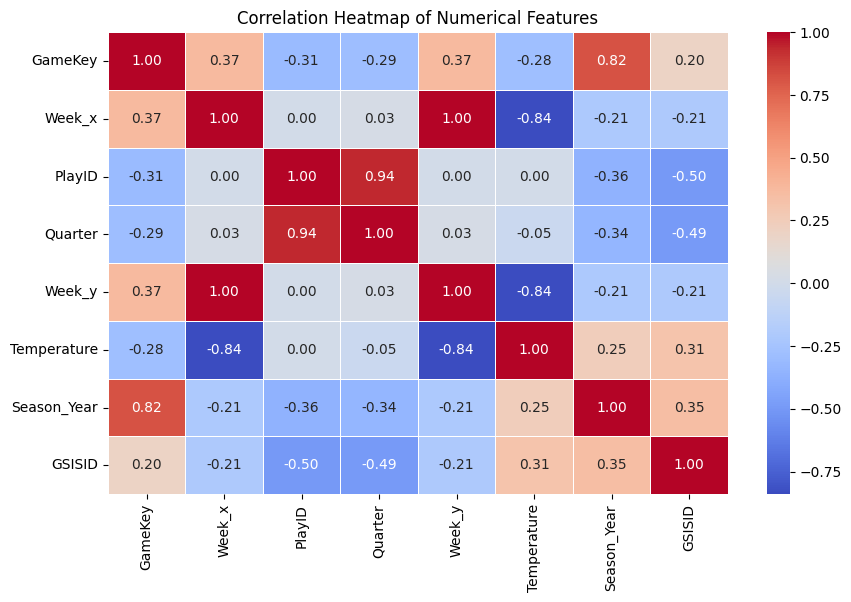

In [12]:
corr_matrix = concussion_only_df.select_dtypes(include=["float64", "int64"]).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


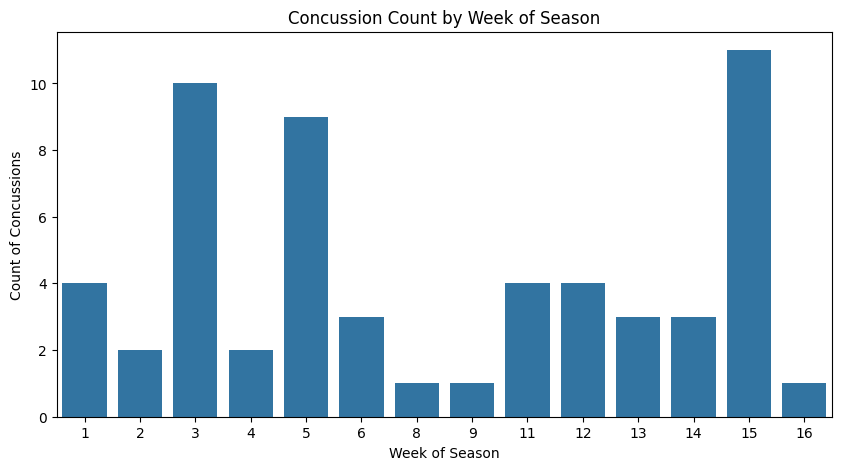

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(x=concussion_only_df["Week_x"])
plt.xlabel("Week of Season")
plt.ylabel("Count of Concussions")
plt.title("Concussion Count by Week of Season")
plt.show()


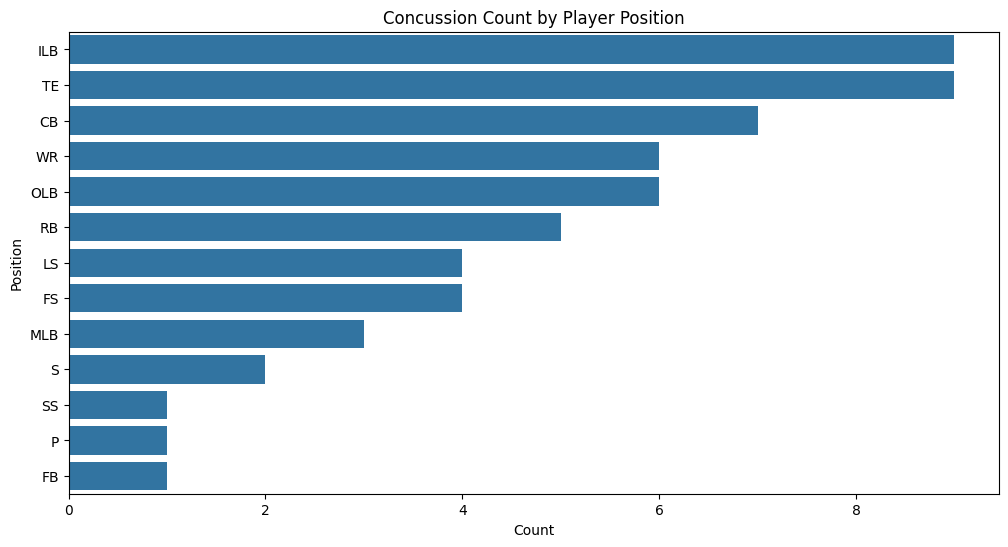

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(y=concussion_only_df["Position"], order=concussion_only_df["Position"].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Position")
plt.title("Concussion Count by Player Position")
plt.show()


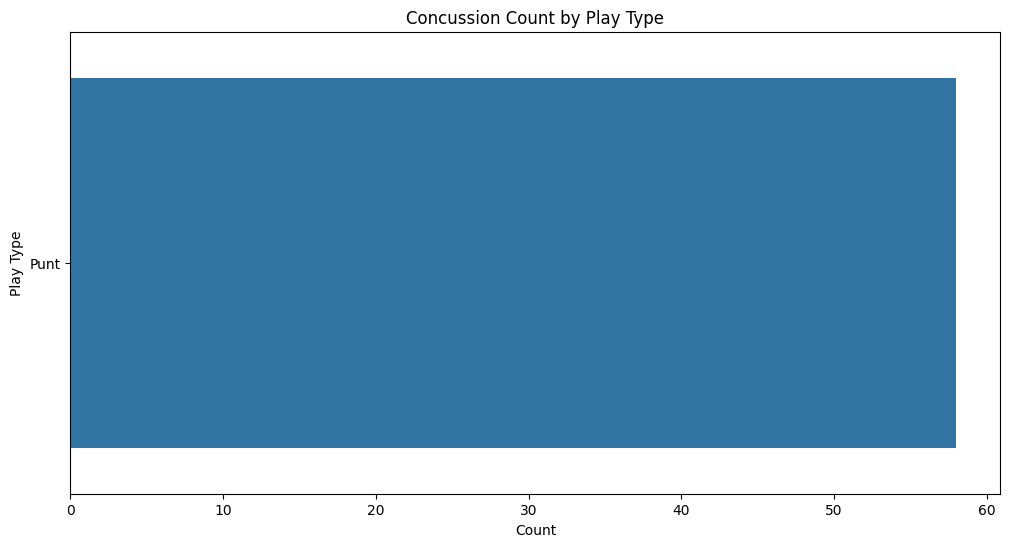

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(y=concussion_only_df["Play_Type"], order=concussion_only_df["Play_Type"].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Play Type")
plt.title("Concussion Count by Play Type")
plt.show()


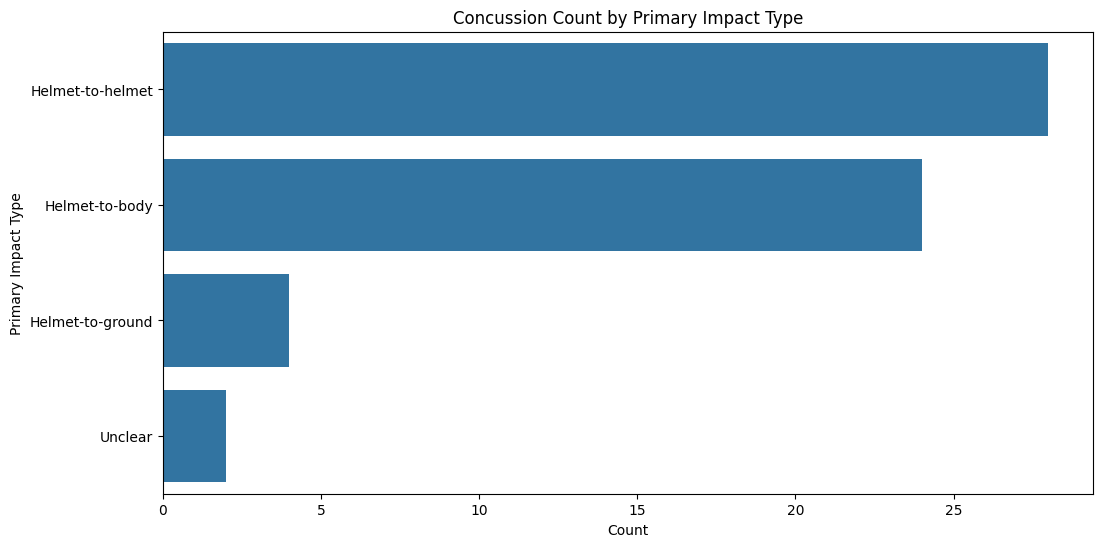

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(y=concussion_only_df["Primary_Impact_Type"], order=concussion_only_df["Primary_Impact_Type"].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Primary Impact Type")
plt.title("Concussion Count by Primary Impact Type")
plt.show()


# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

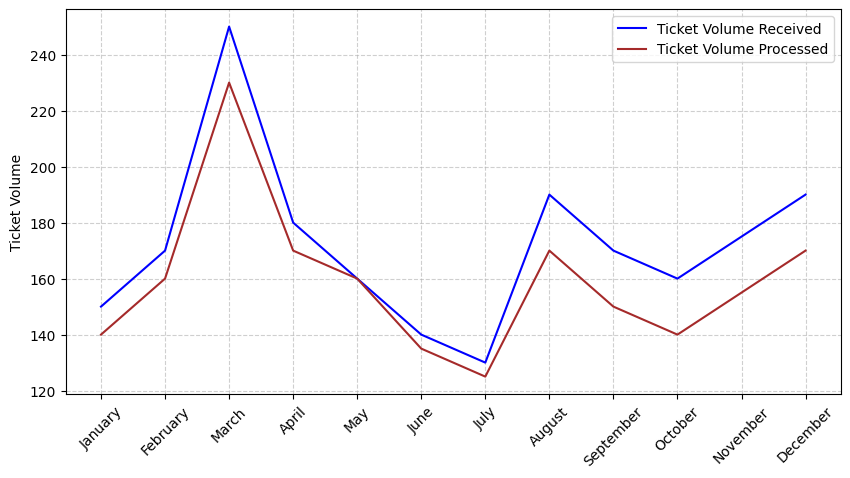

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

months = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]
ticket_received = [150, 170, 250, 180, 160, 140, 130, 190, 170, 160, 175, 190]
ticket_processed = [140, 160, 230, 170, 160, 135, 125, 170, 150, 140, 155, 170]

plt.figure(figsize=(10, 5))
plt.plot(months, ticket_received, label="Ticket Volume Received", color="blue")
plt.plot(months, ticket_processed, label="Ticket Volume Processed", color="brown")

plt.xticks(rotation=45)
plt.ylabel("Ticket Volume")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()


## Analysis Conclusions

### 1. Is the data usable? Does it make sense?  
The dataset is structured well and contains meaningful relationships between variables. Concussion trends align with expectations, and key variables like GameKey, PlayID, and Quarter show logical correlations. However, Week_x and Week_y are identical, suggesting redundancy.

The data is mostly usable, but minor cleaning is needed to remove duplicate columns and check for missing values.

### 2. Are there any outliers?  
Yes, a few potential outliers exist:  

- Concussion count spikes in Week 15, which may indicate an unusual event or external factor.  
- Temperature shows a strong downward trend across the season, which is expected but may need normalization.  
- Some variables, such as GSISID, show weaker correlations with key features, but no extreme values that distort results.  

Outlier handling may be needed, but nothing suggests major data quality issues.

### 3. Are any variables highly correlated, making some redundant?  
- PlayID and Quarter (0.94 correlation) – Makes sense given every play would take place within a specific quarter
- GameKey and Season_Year (0.82 correlation) – Expected structural correlation.  
- Week_x and Week_y (1.00 correlation) – Duplicates; one should be removed.  

Removing redundant columns can help streamline the dataset.

### 4. Do the line graphs show any patterns over time?  
- Concussion rates peak in Weeks 3, 5, and 15, suggesting a possible seasonal trend.  
- Temperature decreases as the season progresses, potentially influencing injury risk.  
- No signs of major data drift, meaning time-based analysis should remain valid.  

The dataset supports time-based analysis, but environmental factors like temperature should be considered.

### 5. Are there confounding variables that could explain certain patterns?  
Some external factors may be influencing the observed trends:  

- Temperature – Strong negative correlation with Week_x (-0.84), possibly impacting injury rates.  
- Player Position – ILB and TE show the highest concussion counts, likely due to playstyle.  
- Helmet-to-Helmet Hits – The leading cause of concussions, possibly linked to rule enforcement or player behavior.  
- Game scheduling & fatigue – Spikes in concussions could be tied to certain game weeks.  

Further analysis is needed to determine the role of these variables in injury risk.

### Final Takeaways  
- The data is usable but requires minor cleaning (removing redundant columns).  
- Some variables are highly correlated, and a few could be removed for clarity.  
- No major data drift, meaning time-based trends are reliable.  
- Confounding variables like temperature, player position, and impact type should be explored further for deeper insights.
